In [25]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5332695144055687607
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3149044121
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13186466766772037633
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [27]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.0.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.22.1
GPU is available


In [28]:
IMG_DIM = (150, 150)
train_files = glob.glob(r'D:\Jupyter notebooks\training_data\*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]

In [29]:
validation_files = glob.glob(r'D:\Jupyter notebooks\validation_data\*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]

(150, 150, 3)


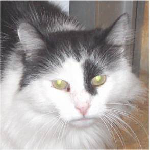

In [30]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[100].shape)
array_to_img(train_imgs[100])

In [31]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [32]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [33]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])


['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [34]:
from keras.applications import vgg16
from keras.models import Model
import keras

In [35]:
vgg = vgg16.VGG16(include_top =False, weights='imagenet', input_shape=input_shape)

In [36]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)


In [37]:
output

<tf.Tensor 'flatten_2/Reshape:0' shape=(None, None) dtype=float32>

In [38]:
vgg_model = Model(vgg.input, output)


In [39]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [40]:
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\saish\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x00000255BDC8F608>,input_3,False
1,<keras.layers.convolutional.Conv2D object at 0x0000025447A88948>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x00000255BDD47348>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x00000255BACF9608>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x00000255BDD47F48>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000025466F22388>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x00000255BDD636C8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x00000255BDD6E5C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000025447A9DA88>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000025447AAC508>,block3_conv3,False


(1, 4, 4, 512)


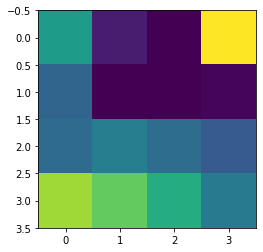

In [41]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [42]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [43]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512,  activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.4282 - accuracy: 0.7897 - val_loss: 0.2720 - val_accuracy: 0.8830
Epoch 2/30
3000/3000 [==============================] - 2s 510us/step - loss: 0.2935 - accuracy: 0.8757 - val_loss: 0.2482 - val_accuracy: 0.8920
Epoch 3/30
3000/3000 [==============================] - 2s 669us/step - loss: 0.2393 - accuracy: 0.9013 - val_loss: 0.2362 - val_accuracy: 0.8970
Epoch 4/30
3000/3000 [==============================] - 2s 695us/step - loss: 0.1996 - accuracy: 0.9190 - val_loss: 0.2556 - val_accuracy: 0.8940
Epoch 5/30
3000/3000 [==============================] - 2s 696us/step - loss: 0.1640 - accuracy: 0.9317 - val_loss: 0.4281 - val_accuracy: 0.8510
Epoch 6/30
3000/3000 [==============================] - 2s 686us/step - loss: 0.1389 - accuracy: 0.9440 - val_loss: 0.2645 - val_accuracy: 0.9040
Epoch 7/30
3000/3000 [==============================] - 2s 693us/step - loss: 

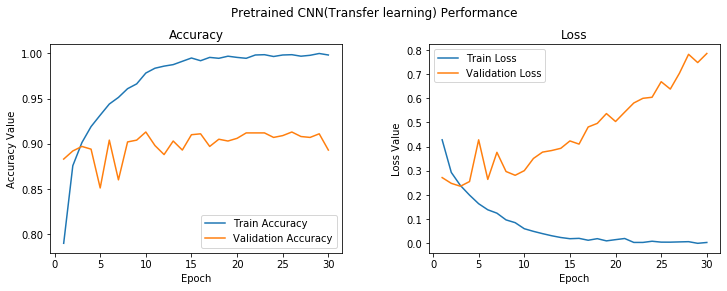

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pretrained CNN(Transfer learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [46]:
model.save('cats_dogs_tlearn_basic_cnn.h5')


# Pre-trained CNN model as a Feature Extractor with Image Augmentation

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [48]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)   

Epoch 1/100
100/100 [==============================] - 42s 422ms/step - loss: 0.6561 - accuracy: 0.6043 - val_loss: 0.5344 - val_accuracy: 0.8040
Epoch 2/100
100/100 [==============================] - 36s 358ms/step - loss: 0.5637 - accuracy: 0.7077 - val_loss: 0.4520 - val_accuracy: 0.8310
Epoch 3/100
100/100 [==============================] - 37s 372ms/step - loss: 0.4998 - accuracy: 0.7633 - val_loss: 0.2720 - val_accuracy: 0.8480
Epoch 4/100
100/100 [==============================] - 36s 363ms/step - loss: 0.4719 - accuracy: 0.7683 - val_loss: 0.3609 - val_accuracy: 0.8550
Epoch 5/100
100/100 [==============================] - 39s 394ms/step - loss: 0.4623 - accuracy: 0.7690 - val_loss: 0.2074 - val_accuracy: 0.8580
Epoch 6/100
100/100 [==============================] - 37s 373ms/step - loss: 0.4348 - accuracy: 0.8073 - val_loss: 0.2180 - val_accuracy: 0.8770
Epoch 7/100
100/100 [==============================] - 37s 366ms/step - loss: 0.4145 - accuracy: 0.8187 - val_loss: 0.3486 -

Epoch 57/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3058 - accuracy: 0.8623 - val_loss: 0.1301 - val_accuracy: 0.9100
Epoch 58/100
100/100 [==============================] - 26s 257ms/step - loss: 0.3093 - accuracy: 0.8667 - val_loss: 0.2793 - val_accuracy: 0.9090
Epoch 59/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3123 - accuracy: 0.8667 - val_loss: 0.2590 - val_accuracy: 0.9100
Epoch 60/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2922 - accuracy: 0.8673 - val_loss: 0.2887 - val_accuracy: 0.9000
Epoch 61/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2964 - accuracy: 0.8713 - val_loss: 0.4481 - val_accuracy: 0.9090
Epoch 62/100
100/100 [==============================] - 26s 259ms/step - loss: 0.2962 - accuracy: 0.8757 - val_loss: 0.0205 - val_accuracy: 0.9090
Epoch 63/100
100/100 [==============================] - 26s 259ms/step - loss: 0.2841 - accuracy: 0.8817 - val_loss: 0

In [49]:
model.save("cats_dogs_tlearn_img_aug_cnn.h5")

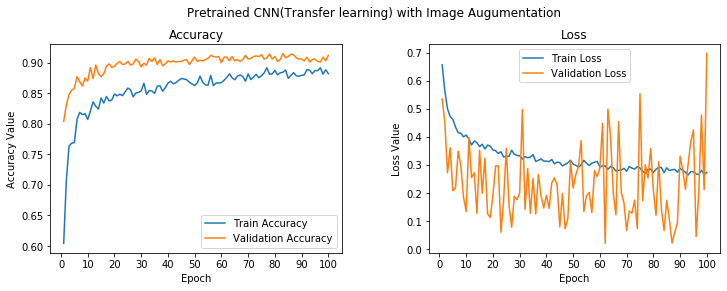

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pretrained CNN(Transfer learning) with Image Augumentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Pre-trained CNN model with Fine-tuning and Image Augmentation


In [51]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x00000255BDC8F608>,input_3,False
1,<keras.layers.convolutional.Conv2D object at 0x0000025447A88948>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x00000255BDD47348>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x00000255BACF9608>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x00000255BDD47F48>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000025466F22388>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x00000255BDD636C8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x00000255BDD6E5C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000025447A9DA88>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000025447AAC508>,block3_conv3,False


In [52]:

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)   

Epoch 1/100
100/100 [==============================] - 39s 393ms/step - loss: 0.5605 - accuracy: 0.6987 - val_loss: 0.1974 - val_accuracy: 0.8940
Epoch 2/100
100/100 [==============================] - 37s 368ms/step - loss: 0.3868 - accuracy: 0.8340 - val_loss: 0.3756 - val_accuracy: 0.9180
Epoch 3/100
100/100 [==============================] - 38s 376ms/step - loss: 0.3300 - accuracy: 0.8567 - val_loss: 0.3097 - val_accuracy: 0.9290
Epoch 4/100
100/100 [==============================] - 38s 379ms/step - loss: 0.2749 - accuracy: 0.8920 - val_loss: 0.2458 - val_accuracy: 0.9480
Epoch 5/100
100/100 [==============================] - 38s 378ms/step - loss: 0.2483 - accuracy: 0.8960 - val_loss: 0.1107 - val_accuracy: 0.9470
Epoch 6/100
100/100 [==============================] - 38s 378ms/step - loss: 0.2410 - accuracy: 0.9033 - val_loss: 0.3100 - val_accuracy: 0.9570
Epoch 7/100
100/100 [==============================] - 38s 378ms/step - loss: 0.2171 - accuracy: 0.9110 - val_loss: 0.1701 -

100/100 [==============================] - 37s 371ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 2.6761e-05 - val_accuracy: 0.9710
Epoch 57/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0368 - accuracy: 0.9850 - val_loss: 0.1989 - val_accuracy: 0.9640
Epoch 58/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0359 - accuracy: 0.9873 - val_loss: 0.0947 - val_accuracy: 0.9620
Epoch 59/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.1441 - val_accuracy: 0.9660
Epoch 60/100
100/100 [==============================] - 37s 371ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.5572 - val_accuracy: 0.9650
Epoch 61/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0315 - accuracy: 0.9877 - val_loss: 0.0724 - val_accuracy: 0.9650
Epoch 62/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0338 - accuracy: 0.9910 - val_loss: 0.4369 - v

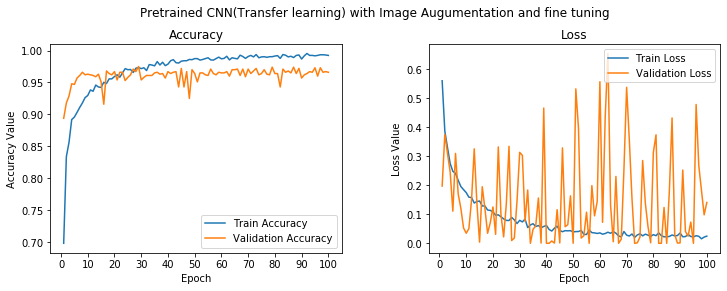

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pretrained CNN(Transfer learning) with Image Augumentation and fine tuning', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [54]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')


# Predicting on test data

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import load_model
# import model_evaluation_utils as meu

# load saved models
tl_cnn = load_model('cats_dogs_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('cats_dogs_tlearn_img_aug_cnn.h5')
tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [58]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


In [67]:
#Transfer Learning — Pre-trained CNN as a Feature Extractor Performance

test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
print(accuracy_score(y_true=test_labels, y_pred=predictions))

0.9


In [66]:
confusion_matrix(y_true=test_labels, y_pred=predictions)

array([[439,  61],
       [ 39, 461]], dtype=int64)

In [68]:
# Transfer Learning — Pre-trained CNN as a Feature Extractor with Image Augmentation Performance

predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
print(accuracy_score(y_true=test_labels, y_pred=predictions))

0.914


In [69]:
confusion_matrix(y_true=test_labels, y_pred=predictions)

array([[465,  35],
       [ 51, 449]], dtype=int64)

In [70]:
# Transfer Learning — Pre-trained CNN with Fine-tuning and Image Augmentation Performance

predictions = tl_img_aug_finetune_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
print(accuracy_score(y_true=test_labels, y_pred=predictions))

0.964


In [71]:
confusion_matrix(y_true=test_labels, y_pred=predictions)

array([[478,  22],
       [ 14, 486]], dtype=int64)